<a href="https://colab.research.google.com/github/restrepo/ComputationalMethods/blob/master/material/one-variable-equations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# One Variable Equations
<a href="https://colab.research.google.com/github/restrepo/ComputationalMethods/blob/master/material/one-variable-equations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Throughout this section and the next ones we shall cover the topic of solutions to one variable equations. Many different problems in physics and astronomy require the use of complex expressions, even with implicit dependence of variables. When it is necessary to solve for one of those variable, an analytical approach is not usually the best solution, because of its complexity or even because it does not exist at all. Different approaches for dealing with this comprehend series expansions and numerical solutions. Among the most widely used numerical approaches are the Bisection or Binary-search method, fixed-point iteration, Newton's methods.

For further details see for example Chap. 5 of Ref. ([1](../index.ipynb#Bibliography)) or Chap. 4 of Ref. ([3](../index.ipynb#Bibliography))


- - -
- [Bisection Method](#Bisection-Method) 
    - [Steps](#Steps-BM)
    - [Stop condition](#Stop-condition-BM)
    - [Error analysis](#Error-analysis-BM)
    - [Example 1](#Example-1)
    - [Example 2](#Example-2)
- [Fixed-point Iteration](./one-variable-equations-fixed-point.ipynb#Fixed-point-Iteration)
    - [Steps](./one-variable-equations-fixed-point.ipynb#Steps-FP)
    - [Example 3](./one-variable-equations-fixed-point.ipynb#Example-3)
    - [Stop condition](./one-variable-equations-fixed-point.ipynb#Stop-condition-FP)
    - [Example 4](./one-variable-equations-fixed-point.ipynb#Example-4)
    - [Activity](./one-variable-equations-fixed-point.ipynb#ACTIVITY-FP)
- [Newton-Raphson Method](./one-variable-equations-fixed-point.ipynb#Newton-Raphson-Method)
    - [Derivation](./one-variable-equations-fixed-point.ipynb#Derivation-NM)
    - [Steps](./one-variable-equations-fixed-point.ipynb#Steps-NM)
    - [Example 5](./one-variable-equations-fixed-point.ipynb#Example-5)
    - [Stop condition](./one-variable-equations-fixed-point.ipynb#Stop-condition-NM)
    - [Convergence](./one-variable-equations-fixed-point.ipynb#Convergence-NM)
- [Secant Method](./one-variable-equations-fixed-point.ipynb#Secant-Method)
    - [Derivation](./one-variable-equations-fixed-point.ipynb#Derivation-SM)
    - [Steps](./one-variable-equations-fixed-point.ipynb#Steps-SM)

- - -
## Bibliography
[1] [Kiusalaas, Numerical Methods in Engineering with Python](https://drive.google.com/file/d/0BxoOXsn2EUNIQUdFVkctR2xWRUk/view?usp=sharing)<br/>
[2] [Jensen, Computational_Physics](https://drive.google.com/file/d/0BxoOXsn2EUNIekRUMFVPYXVsSTg/view?usp=sharing).  Companion repos: https://github.com/mhjensen [Web page](http://compphysics.github.io/ComputationalPhysics/doc/web/course)  <br/>
[3] E. Ayres, [Computational Physics With Python](http://bit.ly/CPwPython)<br/>


In [71]:
%pylab inline
rc('animation', html='jshtml')

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.6/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['info', 'f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


JSAnimation import available at https://github.com/jakevdp/JSAnimation

In [72]:
#from JSAnimation import IPython_display
from matplotlib import animation

In [73]:
import numpy as np


from scipy import integrate
from scipy import optimize

- - - 

# Bisection Method

The Bisection method exploits the [intermediate value theorem](http://en.wikipedia.org/wiki/Intermediate_value_theorem), where a continuous and differentiable function $f$ must have a zero between an interval $[a,b]$ such that $f(a)f(b)<0$, or equivalently, there must be a value $p\in[a,b]$ such that $f(p)=0$. Below the algorithmm is stated explicitly.

## Steps BM

<div style="float: right;" markdown="1">
    <img src="http://upload.wikimedia.org/wikipedia/commons/thumb/8/8c/Bisection_method.svg/300px-Bisection_method.svg.png">
</div>


1. There must be selected two values $a$ and $b$ such that $f(a)f(b)<0$ and $p\in[a,b]$ where $f(p)=0$. In other words, though we do not know the value of the root, we must know that there is at least one within the selected interval.

2. To begin, it must be set $a_1=a$ and $b_1=b$.

3. Calculate the mid-point $p_1$ as

    $$p_1 = a_1 + \frac{b_1-a_1}{2} = \frac{a_1+b_1}{2}$$

4. Evaluate the function in $p_1$, if the [stop condition](#Stop-Condition) is true, go to step 6.

5. If the [stop condition](#Stop-Condition) is not satisfied, then:

    1. If $f(p_1)f(a_1) > 0$, $p\in(p_1,b_1)$. Then set $a_2=p_1$ and $b_2=b_1$

    2. If $f(p_1)f(a_1) < 0$, $p\in(a_1,p_1)$. Then set $a_2=a_1$ and $b_2=p_1$

    3. Go to step 3 using $p_2$, $a_2$ and $b_2$ instead of $p_1$, $a_1$ and $b_1$. For next iterations the index increases until the [stop condition](#Stop-Condition) is reached.

6. The End!

## Stop condition BM

There are several different stop conditions for this algorithm. The most used are stated below:

* A fixed distance between the last two steps (absolute convergence):

    $$|p_i - p_{i-1}|<\epsilon$$

* A fixed relative distance between the last two steps (relative convergence):

    $$\frac{|p_i - p_{i-1}|}{|p_i|}<\epsilon\ \ \ \ \ p_i \neq 0$$

* Function tolerance:

    $$f(p_i)< \epsilon$$

All these conditions should lead to a desired convergence expressed by the $\epsilon$ value. However, the first and the third conditions present some problems when the function has a derivative very large or close to $0$ as evaluated in the root value. When the function is very inclined, the first condition fails as a convergence in the $x$ axis does not guarantee a convergence in the $y$ axis, so the found root $p$ may be far from the real value. When the function is very flat ($dF/dx\rightarrow 0$), the third condition fails due to an analogous reason.

A final stop condition which does not have mathematical motivation but a computational one, is a maximum number of allowed iterations. This condition should be used not only for this algorithm but for all iteration-based numerical methods. This condition guarantees a finite computing time and prevents undesired infinite bucles.

* If $N>N_{max}$, stop!

## Error analysis BM

If we suppose $f\in C[a,b]$ and $f(a)f(b)<0$, the Bisection method generates a sequence of numbers $\left\{p_i\right\}_{i=1}^\infty$ approximating a root $p$ of $f$ as:

$$|p_i-p|\leq \frac{b-a}{2^n},\ \ \ \ \ i\geq 1$$

From this, we can conclude the convergence rate of the method is

$$p_i = p + \mathcal{O}\left( \frac{1}{2^i} \right)$$

This expression allows us to estimate the maximum number of required iterations for achieving a desired precision. The next figure sketches the number of iterations required for some precision.

In [74]:
import time

In [75]:
i=np.arange( 1, 100)
i[:3]

array([1, 2, 3])

In [76]:
# plt.plot( x,y  ) # points joined with straight lines 

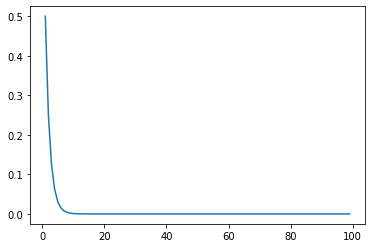

In [77]:
# 1/2**i → exp2(-i)
plt.plot(i,np.exp2(-i))

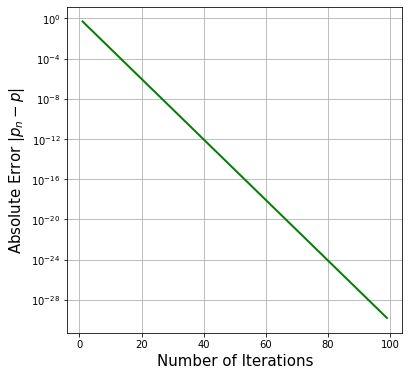

In [78]:
s=time.time()
#Array of iterations
Niter = np.arange( 1, 100 )

plt.figure( figsize=(6,6) )
#plt.semilogy( Niter, 2.0**-Niter, color="green", lw = 2 )
plt.semilogy( Niter, np.exp2(-Niter), color="green", lw = 2 )
plt.grid(True)
plt.xlabel("Number of Iterations",size=15)
plt.ylabel("Absolute Error $|p_n-p|$",size=15)
f=time.time()-s

## Example 1

Find the root of the function $f$

$f(x) = x^3 - 2$

for $20$ iterations, show the result and the relative error in each iteration.

In [79]:
#Defining Bisection function
def Bisection( f, a, b, Nmax, printer=False ):
    """
    Find the root of function f between a and b
    
    f: function
    a,b: the initial interval
    Nmax: Nmax de interations
    printer: bool, to print internal steps
    """
    #verifying the STEP1, a and b with different signs
    import sys
    if f(a)*f(b)>0:
        sys.exit("Error, f(a) and f(b) should have opposite signs")
        return False
    #Assigning the current extreme values, STEP2
    ai = a
    bi = b
    #Iterations
    n = 1
    while n<=Nmax:
        #Bisection, STEP3
        pi = (ai+bi)/2.0
        #Evaluating function in pi, STEP4 and STEP5
        if printer:
            print( "Value for {} iterations: {}".format(n,pi) )
        #Condition A
        if f(pi)*f(ai)>0:
            ai = pi
        #Condition B
        elif f(pi)*f(ai)<0:
            bi = pi
        #Condition C: repeat the cycle
        n+=1
    #Final result
    return pi

Defining function

In [7]:
def function(x):
    return x**3.0 - 2.0

Finding the root of the function. The real root is $\sqrt[3]{2}$, so `a` and `b` should enclose this value

In [8]:
#Defining a and b
a = 0.0
b = 2.0
Nmax = 20
result = Bisection(function, a, b, Nmax, printer=True)
print ( "Real value:", 2**(1/3.0))
print ( "Absolute error", abs((2**(1/3.0)-result)) )

Value for 1 iterations: 1.0
Value for 2 iterations: 1.5
Value for 3 iterations: 1.25
Value for 4 iterations: 1.375
Value for 5 iterations: 1.3125
Value for 6 iterations: 1.28125
Value for 7 iterations: 1.265625
Value for 8 iterations: 1.2578125
Value for 9 iterations: 1.26171875
Value for 10 iterations: 1.259765625
Value for 11 iterations: 1.2607421875
Value for 12 iterations: 1.26025390625
Value for 13 iterations: 1.260009765625
Value for 14 iterations: 1.2598876953125
Value for 15 iterations: 1.25994873046875
Value for 16 iterations: 1.259918212890625
Value for 17 iterations: 1.2599334716796875
Value for 18 iterations: 1.2599258422851562
Value for 19 iterations: 1.2599220275878906
Value for 20 iterations: 1.2599201202392578
Real value: 1.2599210498948732
Absolute error 9.296556153781665e-07


Using the error analysis, we can predict the produced error at $20$ iterations by computing:

$$ \left( \frac{1}{2^{20}}\right) \approx 9.53674316\times 10^{-7} $$

This value is very close to the obtained relative error.

If we were interested in a double precision, i.e. $\epsilon \sim 10^{-17}$, the number of required iterations would be:

$$ 10^{-17} = \left( \frac{1}{2^{N}}\right) \longrightarrow N = \frac{17}{\log_{10}(2)} \approx 56 $$

Now the same but using scipy implementation

In [9]:
from scipy import optimize 

See help with `optimize?:`

Check the help:

In [10]:
help(optimize.bisect)

Help on function bisect in module scipy.optimize.zeros:

bisect(f, a, b, args=(), xtol=2e-12, rtol=8.881784197001252e-16, maxiter=100, full_output=False, disp=True)
    Find root of a function within an interval using bisection.
    
    Basic bisection routine to find a zero of the function `f` between the
    arguments `a` and `b`. `f(a)` and `f(b)` cannot have the same signs.
    Slow but sure.
    
    Parameters
    ----------
    f : function
        Python function returning a number.  `f` must be continuous, and
        f(a) and f(b) must have opposite signs.
    a : scalar
        One end of the bracketing interval [a,b].
    b : scalar
        The other end of the bracketing interval [a,b].
    xtol : number, optional
        The computed root ``x0`` will satisfy ``np.allclose(x, x0,
        atol=xtol, rtol=rtol)``, where ``x`` is the exact root. The
        parameter must be nonnegative.
    rtol : number, optional
        The computed root ``x0`` will satisfy ``np.allclose(

## General arguments and options of a SciPy function

Let define a general multiparameter 
* `f`
with a mandatory parameter and two optional parameters, corresponding to a straight line with the slope and the intercept as parameters
$$
f(x)=mx+b\,,
$$

In [82]:
def f(x,m=3,b=-2):
    return m*x+b

In [83]:
f(0.66666666666666666,-3,2)

0.0

We have at least three ways to use a multiparameter function, the first two with the implicit `lambda` function

In [13]:
optimize.bisect(lambda x: -3*x+2,-10,10)

0.6666666666671972

In [14]:
optimize.bisect(lambda x: f(x,-3,2),-10,10,)

0.6666666666671972

and the recommended way to used the designed implementation in Scipy through the `args` parameter which is common to many methods 

In [15]:
optimize.bisect(f,-10,10,args=(-3,2))

0.6666666666671972

* `xtol`

In [16]:
optimize.bisect(f,-10,10,args=(-3,2),xtol=1E-17)

0.6666666666666671

* `maxiter`

In [17]:
optimize.bisect(f,-10,10,args=(-3,2),xtol=1E-17,maxiter=10000)

0.6666666666666671

In [18]:
optimize.bisect(f,-10,10,args=(-3,2),xtol=1E-17,rtol=1E-15,maxiter=10000)

0.6666666666666671

* `full_output`

In [19]:
x0,r=optimize.bisect(f,-10,10,args=(-3,2),xtol=1E-17,full_output=True)

In [20]:
type(r)

scipy.optimize.zeros.RootResults

Check the code

In [21]:
r.function_calls

57

The help of the function is write directly in the code of the Scipy method `bisect`

In [52]:
optimize.bisect??

Check the internal referenced code

In [53]:
optimize._zeros??

### Example
Find the roots of
$$x^3=2$$

In [84]:
def function(x):
    return x**3.0 - 2.0

In [85]:
todo=optimize.bisect(function,a,b,full_output=True)

ValueError: ignored

In [65]:
type(todo)

float

In [66]:
len(todo)

TypeError: ignored

In [67]:
result=todo[0]
result

TypeError: ignored

In [ ]:
r=todo[1]
r

In [ ]:
type(r)

In [ ]:
r.iterations

In [86]:
todo=optimize.bisect(function,a,b,full_output=False)

ValueError: ignored

In [ ]:
type(todo)

In [ ]:
a = 0.0
b = 2.0

result,r=optimize.bisect(function,a,b,full_output=True)

In [ ]:
result

In [ ]:
2**(1/3.0)

Check `r` object by using the `<TAB>` key next

In [ ]:
r.iterations

In [ ]:
r.function_calls

In [ ]:
2**(-r.iterations)

In [ ]:
abs((2**(1/3.0)-result))

In [ ]:
r.converged

In [ ]:
result,r=optimize.bisect(function,a,b,xtol=1E-17,full_output=True)

In [ ]:
r.iterations

In [ ]:
abs((2**(1/3.0)-result))

In [63]:
2**(-r.iterations)

4.440892098500626e-16

### <font color='red'> ACTIVITY </font>

<font color='red'>
In an IPython notebook, use the scipy implementation and find the first solution to the equation
    
$ 7 = \sqrt{x^2+1}+e^x\sin x $
    
CLUE: Check graphically (with matplotlib) that the solution is within the interval $[0,2]$.
</font>

[solution](./solutions/sltn_bisect.ipynb)

In [87]:
import numpy as np
import matplotlib.pylab as plt

In [89]:
def function(x):
    return (x**2 + 1)**0.5 + np.exp(x) * np.sin(x) - 7

In [91]:
a = 0.0
b = 2.0
result,r=optimize.bisect(function,a,b,full_output=True)

In [92]:
result,r=optimize.bisect(function,a,b,xtol=1E-17,full_output=True)

In [93]:
result

1.628718494927008

In [94]:
r

      converged: True
           flag: 'converged'
 function_calls: 53
     iterations: 51
           root: 1.628718494927008

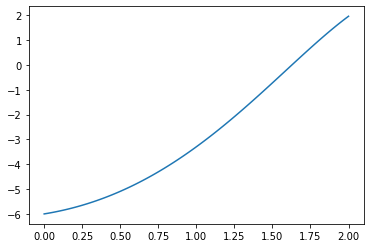

In [95]:
x = np.linspace(0.0, 2.0, 100)
y = (x**2 + 1)**0.5 + np.e**x * np.sin(x) - 7
plt.plot(x,y)

In [58]:
a,b,c=(2,3,4)

In [59]:
c

4

In [60]:
import numpy as np

In [61]:
# Solo usar para constante
np.e

2.718281828459045

In [62]:
np.exp(1)

2.718281828459045

## Example 2

In orbital mechanics, when solving the central-force problem it becomes necessary to solve the Kepler's equation. This is a transcendental equation that relates the orbital parameters of the trajectory.

*Kepler equation:* $M = E - \epsilon \sin E$

where $M$ is the mean anomaly, $E$ the eccentric anomaly and $\epsilon$ the eccentricity. The mean anomaly can be computed with the expression

$$M = n\ t = \sqrt{ \frac{GM}{a^3} } t$$

where $n$ is the mean motion, $G$ the gravitational constant, $M$ the mass of the central body and $a$ the semi-major axis. $t$ is the time where the position in the trajectory will be computed.

The coordinates $x$ and $y$ as time functions can be recovered by means of the next expressions

$$x(t) = a(\cos E - \epsilon)$$

$$y(t) = b\sin E$$

where $b = a \sqrt{1-\epsilon^2}$ is the semi-minor axis of the orbit and the implicit time-dependence of the eccentric anomaly $E$ is computed through the Kepler's equation.

**Problem:**

For a stallite orbiting the earth in a equatorial trajectory with eccentricity $\epsilon = 0.5$ at a geostationary distance for the semi-major axis, tabulate the positions $x$ and $y$ within the orbital plane in intervals of $15$ min during $5$ hours.

**Parameters:**

- $\epsilon = 0.5$

- $a = 35900$ km

- $G = 6.67384 \times 10^{-11}$ m$^3$ kg$^{-1}$ s$^{-2}$

- $M_{\oplus} = 5.972\times 10^{24}$ kg

In [96]:
#====================================================================
#Parameters
#====================================================================
#Eccentricity
eps = 0.5
#Semi-major axis    [m]
a = 35900e3
#Gravitational constant    [m3kg-1s-2]
GC = 6.67384e-11
#Earth mass    [kg]
Me = 5.972e24

#Semi-minor axis    [m]
b = a*(1-eps**2.0)**0.5
#Mean motion
n = ( GC*Me/a**3.0 )**0.5

#Hour to Second
HR2SC = 3600.
#Initial time    [hr]
t0 = 0*HR2SC
#Final time    [hr]
tf = 5*HR2SC
#Time step    [hr]
tstep = 0.25*HR2SC
#Number of maxim iterations
Niter = 56
#Root interval
a0 = -10
b0 = 10

#====================================================================
#Kepler Function
#====================================================================
def kepler( E ):
    func = E - eps*np.sin(E) - n*t
    return func

#====================================================================
#Position function
#====================================================================
def r(E):
    x = a*(np.cos(E)-eps)
    y = b*np.sin(E)
    return [x/1.e3, y/1.e3]

In 0.000000 hours, the satellite is located at (17950.000000,0.000000) km
In 0.250000 hours, the satellite is located at (17454.741542,5146.426647) km
In 0.500000 hours, the satellite is located at (16033.097675,10023.437750) km
In 0.750000 hours, the satellite is located at (13848.847528,14430.262364) km
In 1.000000 hours, the satellite is located at (11104.379909,18261.701894) km
In 1.250000 hours, the satellite is located at (7989.437466,21493.410338) km
In 1.500000 hours, the satellite is located at (4657.168469,24151.489610) km
In 1.750000 hours, the satellite is located at (1221.066166,26286.121177) km
In 2.000000 hours, the satellite is located at (-2238.747501,27954.872718) km
In 2.250000 hours, the satellite is located at (-5667.264143,29214.008624) km
In 2.500000 hours, the satellite is located at (-9027.373695,30114.739827) km
In 2.750000 hours, the satellite is located at (-12294.392344,30702.085866) km
In 3.000000 hours, the satellite is located at (-15452.164136,31014.965

Text(0, 0.5, '$y$ coordinate [km]')

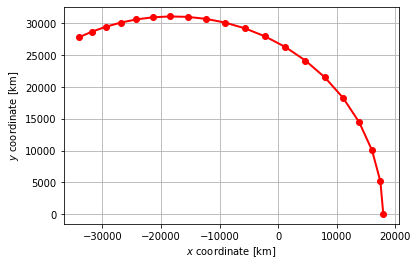

In [97]:
#====================================================================
#Solving for different times
#====================================================================
#Time array
times = np.arange( t0, tf, tstep )

rpos = []
for t in times:
    #Finding the new eccentric anomaly
    E = optimize.bisect( kepler, a0, b0 )
    #Computing coordinates at this time
    ri = r(E)
    print ("In %f hours, the satellite is located at (%f,%f) km"%(t/HR2SC, ri[0], ri[1]) )
    rpos.append( ri )
rpos = np.array(rpos)    

#Plotting
plt.plot( rpos[:,0], rpos[:,1], "o-", color="red", lw = 2 )
plt.grid(True)
plt.xlabel("$x$ coordinate [km]")
plt.ylabel("$y$ coordinate [km]")

- - - 